Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Step 2: Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

First 5 rows:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
 Cu

Step 3: Select Features for Clustering

In [3]:
# Commonly: Annual Income & Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

Step 4: Elbow Method to find optimal K

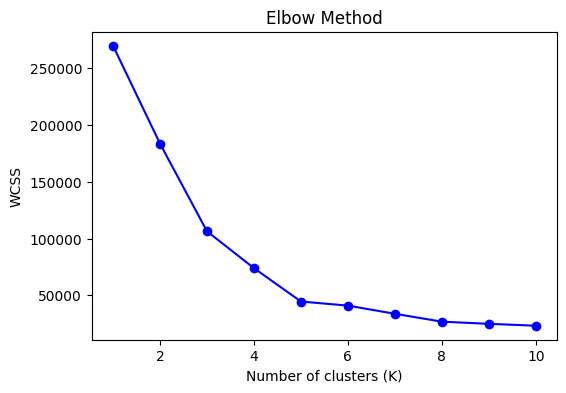

In [4]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

Step 5: Fit K-Means with chosen K (e.g., 5 from elbow method)

In [5]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

Step 6: Add cluster labels to DataFrame

In [6]:
df['Cluster'] = labels

Step 7: Visualize Clusters

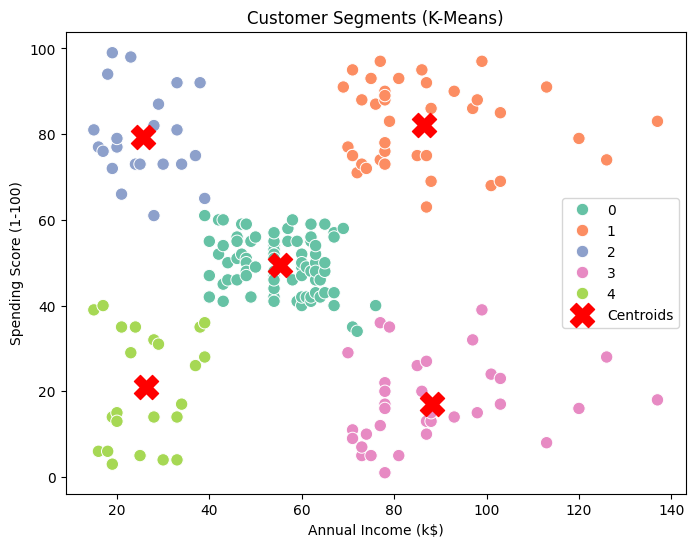

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X[:,0], y=X[:,1],
    hue=labels,
    palette='Set2',
    s=80
)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Step 8: Evaluate Clustering with Silhouette Score

Silhouette Score: 0.554


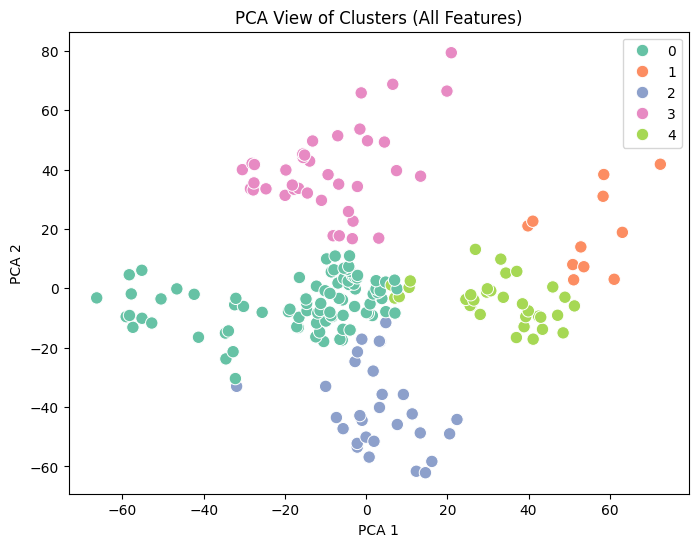

In [8]:
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.3f}")

# Optional: PCA for all features
features_all = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_all)

kmeans_all = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels_all = kmeans_all.fit_predict(features_all)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=features_pca[:,0], y=features_pca[:,1],
    hue=labels_all,
    palette='Set2',
    s=80
)
plt.title('PCA View of Clusters (All Features)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()